## Info

* Author : hyg4438(HongYongGi)/email : hyg4438@gachon.ac.kr

## log
* written date : 20220221

# Python Deep Learning PyTorch
## Part 3. Deep Learning


---

## 01 딥러닝의 정의

* 딥러닝은 새로운 모델의 개념이 아니라 신경망이 발전한 모델이다. 
    * 신경망은 학습하는 알고리즘의 특성상 과적합이 심하게 일어나며 Gradient Vanishing이 일어남(해결하기 위해서 학습 과정 내에서 과적합을 방지할 수 있는 SVM과 Ensemble Learning이 많이 쓰임)
    
    
* 딥러닝의 정의는 크게 두 가지로 나눌 수 있다.
    * 딥러닝은 2개 이상의 Hidden Layer를 지니고 있는 다층 신경망(Deep Neural Network, DNN)이라 할 수 있습니다.
    * 신경망을 기반으로 한 모델이기 때문이다.
    * 딥러닝이 본격적으로 발전하게 된 것은 단순히 모델이 깊어졌기 때문이 아니다. 딥러닝에는 Graphical Representation Learning이라는 특징이 있기 때문이다.
    
    
---

## 02 딥러닝이 발전하게 된 계기

* 딥러닝이 발전하게 된 데에는 크게 두 가지 원인이 있음

    1. 신경망의 단점으로 지적돼왔던 과적합과 Gradient Vanishing을 완화시킬 수 있는 알고리즘이 발전한 것 
    2. 타 알고리즘 대비 학습 시간이 매우 오래 걸리는 문제가 있었는데 Graphics Processing Unit(GPU)을 신경망의 연산에 사용할 수 있게 되면서 이를 해결하게 된 것이다.
    
---

## 03 딥러닝의 발전을 이끈 알고리즘

### 03.1 Dropout

* Dropout은 신경망의 학습 과정 중 Layer의 노드를 랜덤하게 Drop함으로써 Generalization 효과를 가져오게 하는 테크닉

* Dropout을 적용한다는 것은 Weight Matrix에 랜덤하게 일부 Column에 0을 집어넣어 연산을 한다고 이해하면 됨

* Dropout을 적용할 때는 얼마나 랜덤하게 Dropout한 것인지에 대한 확률 값을 지정해야 하며 이는 Input layer와 Hidden Layer에도 적용할 수 있다.

* 또한 Epoch마다 랜덤하게 Dropout한다.

ex) Input Layer에 대해 20%. Hidden Layer에 대해 30%를 적용한다고 가정하면, 그러면 Input Data의 Column에 랜덤하게 20%는 0을 집어넣고 Weight Matrix의 Column에도 랜덤하게 30%는 0을 집어넣어 Feed Forward를 진행하고 Back Propagation을 진행한다. 그다음 Epoch에서 Dropout을 적용할 때 이번 Epoch와 독립적으로 랜덤하게 적용됨.
(즉, 이전 Epoch과는 다른 Column에 0을 집어넣는 것이다. 이러한 방식으로 계속 연산하면 과적합을 어느 정도 방지하는 효과를 가져온다는 것이다. Dropout은 처음 제안된 이후로도 현재까지 기본적으로 신경망을 디자인할 때 범용적으로 많이 사용되고 있는 테크닉이다.)

---

In [1]:
''' 1. Module Import '''
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
''' 2. 딥러닝 모델을 설계할 때 활용하는 장비 확인 '''
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.10.2  Device: cuda


In [15]:
BATCH_SIZE = 32
EPOCHS = 30

In [16]:
''' 3. MNIST 데이터 다운로드 (Train set, Test set 분리하기) '''
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

In [17]:
''' 4. 데이터 확인하기 (1) '''
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break


X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


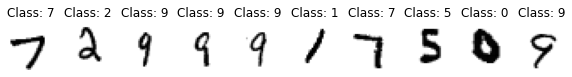

In [18]:
''' 5. 데이터 확인하기 (2) '''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

In [19]:
''' 6. Multi Layer Perceptron (MLP) 모델 설계하기 '''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [20]:
''' 7. Optimizer, Objective Function 설정하기 '''
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [21]:
''' 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

In [22]:
''' 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [23]:
''' 10. MLP 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기 '''
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.459884
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.322014
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.304762
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.293983
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.335092
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.323176
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.278047
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.287803
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.233943
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.178774

[EPOCH: 1], 	Test Loss: 2.2425, 	Test Accuracy: 28.86 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.247509
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.172461
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.196803
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.146855
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 2.062236
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 1.931362
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 1.931328
T

93.45%

---

### Dropout 사용 모델

In [24]:
# ''' 6. Multi Layer Perceptron (MLP) 모델 설계하기 '''
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(28 * 28, 512)
#         self.fc2 = nn.Linear(512, 256)
#         self.fc3 = nn.Linear(256, 10)

#     def forward(self, x):
#         x = x.view(-1, 28 * 28)
#         x = self.fc1(x)
#         x = F.sigmoid(x)
#         x = self.fc2(x)
#         x = F.sigmoid(x)
#         x = self.fc3(x)
#         x = F.log_softmax(x, dim = 1)
#         return x


''' 6. Multi Layer Perceptron (MLP) 모델 설계하기 '''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5 # 추가

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) # 추가
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) # 추가
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [25]:
''' 7. Optimizer, Objective Function 설정하기 '''
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [26]:
''' 10. MLP 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기 '''
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.515180
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.397249
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.310801
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.295760
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.245982
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.293839
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.309143
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.275986
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.325297
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.340597

[EPOCH: 1], 	Test Loss: 2.2808, 	Test Accuracy: 16.60 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.253518
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.248695
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.314086
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.236936
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 2.317499
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 2.260069
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 2.233555
T

92.04%

## Activation 함수
* ReLU 함수

In [28]:
''' 6. Multi Layer Perceptron (MLP) 모델 설계하기 '''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [29]:
''' 7. Optimizer, Objective Function 설정하기 '''
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
''' 10. MLP 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기 '''
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.295533
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 1.933292
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 1.033345
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.828259
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.928539
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.529546
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.242869
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.484704
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.422585
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.518841

[EPOCH: 1], 	Test Loss: 0.3201, 	Test Accuracy: 90.94 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.348783
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.424429
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.235638
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.314581
